In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
This is a demonstration script with naiv optimization.
Results of this script are not used in the corresponding paper
"""
import planarfibers
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 1000)
SCALE_HOMOGENEOUS = True
ORDER = 720

##########################################<br>
Get points on views

In [3]:
df = planarfibers.discretization.get_points_on_slices(
    radii=["0", "1/2", "9/10"],
    la0s=["1/2", "4/6", "5/6", "1"],
    numeric=True,
)

##########################################<br>
Get odfs

In [4]:
df["lagrange_multipliers"] = df.apply(
    lambda row: planarfibers.reconstruction.get_reconstructed_fodf_planar_fast(
        la0=row["la0"],
        d0=row["d_0"],
        d7=row["d_7"],
        order=ORDER,
        solver_kwargs=None,
        tolerance=1e-9,
    ).x,
    axis=1,
)

##############################################<br>
Define angle discretization

In [5]:
angles = planarfibers.reconstruction.IntegrationSchemeCircle(order=ORDER).angles

##############################################<br>
Get discrete odf values

In [6]:
problem = planarfibers.reconstruction.ReconstructionProblemPlanar2DFast()
df["odf_values"] = df.apply(
    lambda row: problem.odf(*row["lagrange_multipliers"], angles),
    axis=1,
)

##############################################<br>
Layout

In [7]:
la0_key_extensions = {
    "-la0-0": "3 / 6",
    "-la0-1": "4 / 6",
    "-la0-2": "5 / 6",
}
grid_indices = {
    "vshc-central": (2, 0),
    "vshc-m90-0": (3, 0),
    "vshc-m90-1": (4, 0),
    "vshc-m45-0": (3, 1),
    "vshc-m45-1": (4, 2),
    "vshc-0-0": (2, 1),
    "vshc-0-1": (2, 2),
    "vshc-45-0": (1, 1),
    "vshc-45-1": (0, 2),
    "vshc-90-0": (1, 0),
    "vshc-90-1": (0, 0),
}
legend_axis_indices = (4, 1)
remaining_axes_indices = [(0, 1), (1, 2), (3, 2), legend_axis_indices]

##############################################

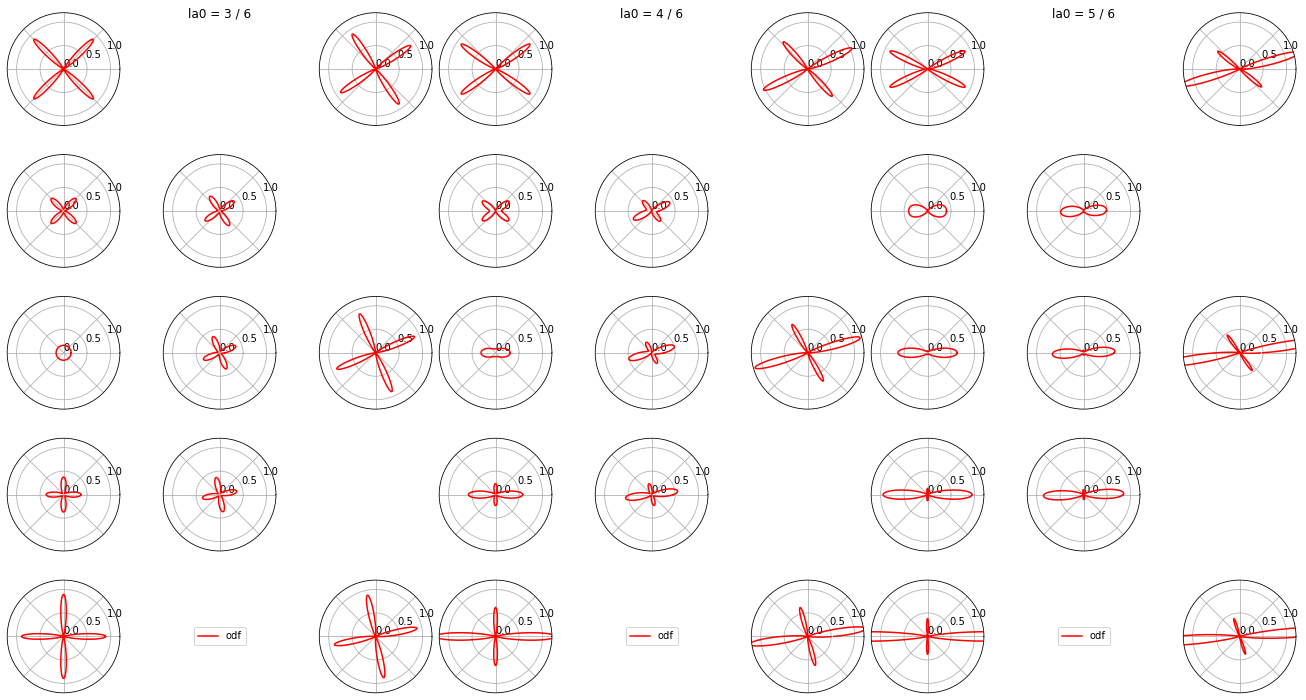

In [8]:
nbr_slices = len(la0_key_extensions)
fig = plt.figure(figsize=(6 * nbr_slices, 10))
subfigs = fig.subfigures(1, nbr_slices, wspace=0.0)
for index, (key_extension, la0val) in enumerate(la0_key_extensions.items()):
    subfig = subfigs[index]
    subfig.suptitle(f"la0 = {la0val}")
    axs = subfig.subplots(ncols=3, nrows=5, subplot_kw={"projection": "polar"})
    lines = []  # Initialize legend lines
    for key_N4_start, grid_index in grid_indices.items():
        ax = axs[grid_index]
        key = key_N4_start + key_extension
        ax.plot(angles, df.loc[key]["odf_values"], label="odf", color="red")

        # Update legend if something has been plotted
        lines_tmp, labels_tmp = ax.get_legend_handles_labels()
        if len(lines_tmp) > len(lines):
            lines, labels = lines_tmp, labels_tmp
    for ax in axs.flatten():
        ax.set_xticklabels([])
        if SCALE_HOMOGENEOUS:
            ax.set_ylim(
                bottom=0,
                top=1.2,
            )
            ax.set_yticks([0, 0.5, 1])
    legend_axis = axs[legend_axis_indices]
    legend_axis.legend(lines, labels, loc="center")
    for indice in remaining_axes_indices:
        ax = axs[indice]
        ax.axis("off")
fig.tight_layout()

##############################################<br>
Layout view on orthotropic points

In [9]:
grid_indices = {
    "v00-upper-0": (0, 0),
    "v00-upper-1": (0, 1),
    "v00-upper-2": (0, 2),
    #
    "v00-mid-0": (1, 0),
    "v00-mid-1": (1, 1),
    "v00-mid-2": (1, 2),
    #
    "v00-lower-0": (2, 0),
    "v00-lower-1": (2, 1),
    "v00-lower-2": (2, 2),
    "ud": (2, 3),
    #
}
legend_axis_indices = (0, 3)
remaining_axes_indices = [(1, 3), legend_axis_indices]

##############################################

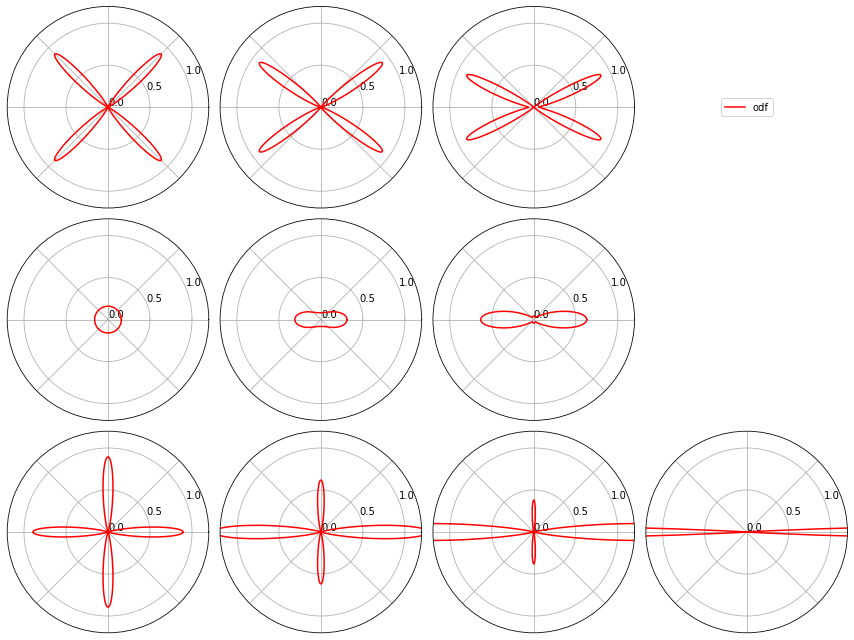

In [10]:
fig, axs = plt.subplots(
    figsize=(12, 9), ncols=4, nrows=3, subplot_kw={"projection": "polar"}
)
lines = []  # Initialize legend lines
for key_N4_start, grid_index in grid_indices.items():
    ax = axs[grid_index]
    key = key_N4_start
    ax.plot(angles, df.loc[key]["odf_values"], label="odf", color="red")

    # Update legend if something has been plotted
    lines_tmp, labels_tmp = ax.get_legend_handles_labels()
    if len(lines_tmp) > len(lines):
        lines, labels = lines_tmp, labels_tmp
for ax in axs.flatten():
    ax.set_xticklabels([])
    if SCALE_HOMOGENEOUS:
        ax.set_ylim(
            bottom=0,
            top=1.2,
        )
        ax.set_yticks([0, 0.5, 1])
legend_axis = axs[legend_axis_indices]
legend_axis.legend(lines, labels, loc="center")
for indice in remaining_axes_indices:
    ax = axs[indice]
    ax.axis("off")
fig.tight_layout()

# plt.show()